<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_5/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,3) = 1

In [ ]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

# **Problem** **1**. <br>
2+2$\alpha$Hz = 4Hz <br>
5+5$\alpha$Hz = 10Hz <br>

Part 1:


In [ ]:
Fs = 100
f0 = 4
f1 = 10
tf = 10
n=np.arange(0, tf, (1/Fs))
def chirp_signal(t):
  ft = f0 + (f1 - f0) * t / tf
  return np.sin(2*pi*ft*t)

w = chirp_signal(n)

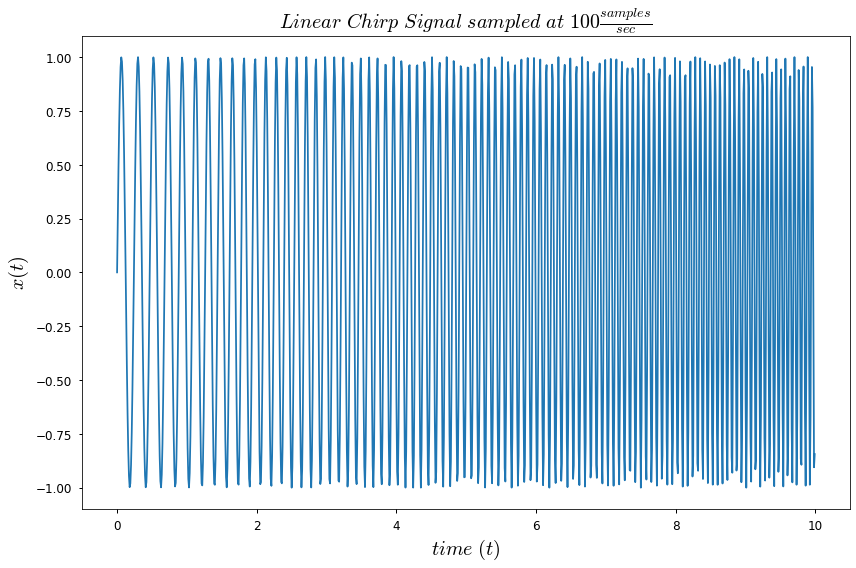

In [ ]:
fig, axs = plt.subplots(figsize=(12,8))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None):  
    axs.plot(x, y)
    axs.set_title(r'$Linear\ Chirp\ Signal\ sampled\ at\ 100\frac{samples}{sec}$', fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 20)
    axs.set_ylabel(yaxis_label, fontsize = 20)
    axs.tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n, w , xaxis_label=r'$time\ (t)$', yaxis_label=r'$x(t)$')
fig.savefig('fig1.png')

Part 2:

In [ ]:
def mag_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    return N, X
    
frequency_1, ms_1 = mag_spec(w, Fs, Fs/2)

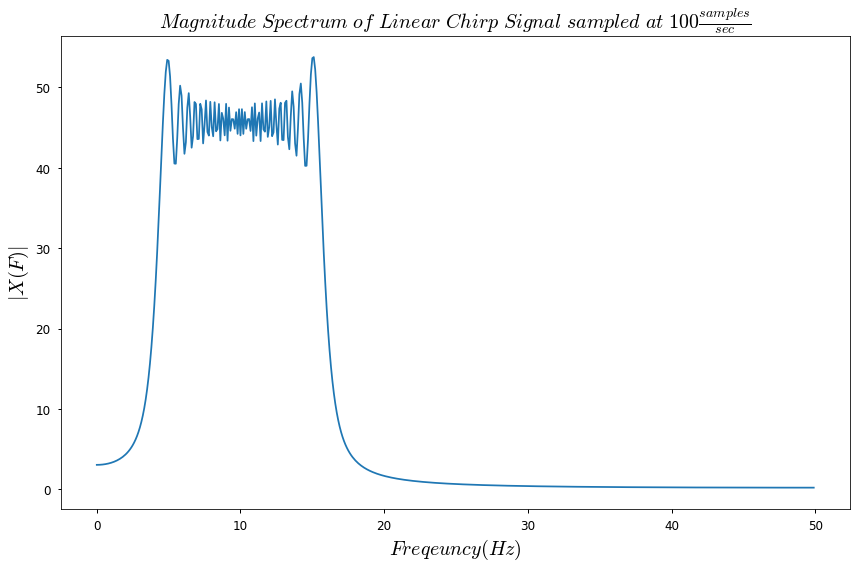

In [ ]:
fig, axs = plt.subplots(figsize=(12,8))
def plot(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(x, y)
    axs.set_title(r'$Magnitude\ Spectrum\ of\ Linear\ Chirp\ Signal\ sampled\ at\ 100\frac{samples}{sec}$', fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 20)
    axs.set_ylabel(yaxis_label, fontsize = 20)
    axs.tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot(frequency_1, ms_1, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=0)
fig.savefig('fig2.png')

Part 3:

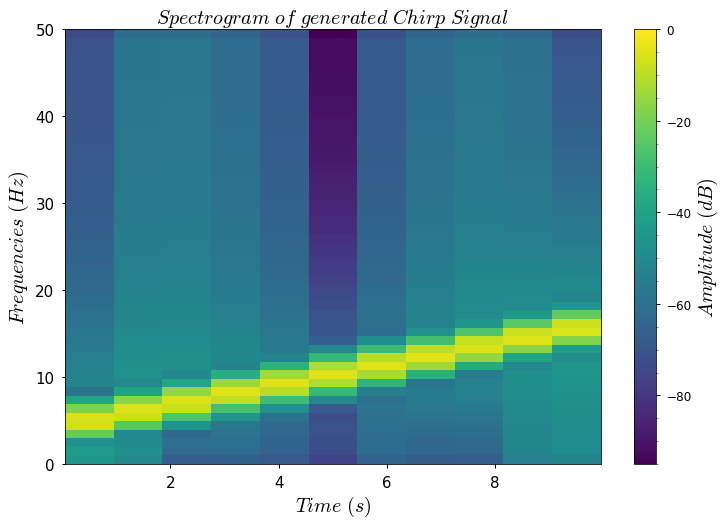

In [58]:
fs = 100
Nos = 100
def specgram2d(y, Nos, fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 20)
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = ax.specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 20)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 20)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 20)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  fig.tight_layout()


fig1, ax1 = plt.subplots(figsize=(12,8))
specgram2d(w, Nos, fs, ax=ax1, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal$')
#plt.show()

Spectrograms of Generated Chirp Signal for varying window lengths